# RFM ANALYSIS

    1. R - Recency : How recently a customer has made a purchase.
    2. F - Frequency : How often a customer makes a purchase
    3. M - Monetory : How much money a customer spends in total

In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Data file - https://drive.google.com/file/d/1XvS2y7eA-yPn8aVbfobCQAlMNB06J_wQ/view?usp=drive_link

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/E-com_Data.csv')

# data volumne
data.shape

(541116, 12)

In [ ]:
# data sample
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [ ]:
# Columns needed for RFM Analysis grouped by CustomerID
    # 1. Recency - Date of purchase
    # 2. Frequency - InvoieNo
    # 3. Monetory - Price

In [ ]:
# retaining the columns needed for the analysis
data = data[['CustomerID', 'InvoieNo', 'Date of purchase', 'Price']]

# renaming the columns
data.rename(columns={'InvoieNo': 'InvoiceNo',
                     'Date of purchase': 'Date'}, inplace=True)

# data sample
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [ ]:
# Missing value proportion
round(data.isnull().mean()*100, 2)

,0
CustomerID,25.30
InvoiceNo,0.58
Date,0.58
Price,0.58


In [ ]:
# dropping the missing value
data = data.dropna(subset=['CustomerID'])

# data sample after treating
round(data.isnull().mean()*100, 2)

,0
CustomerID,0.0
InvoiceNo,0.0
Date,0.0
Price,0.0


In [ ]:
# data duplicates
print('Number of duplicated rows in the data before treating:', data.duplicated().sum())

# treating the duplicates
data = data.drop_duplicates(ignore_index=True)

# duplicates after treating the data
print('Number of duplicated rows in the data after treating:', data.duplicated().sum())

Number of duplicated rows in the data before treating: 1330
Number of duplicated rows in the data after treating: 0


In [ ]:
# data type check
data.dtypes

,0
CustomerID,float64
InvoiceNo,float64
Date,object
Price,float64


In [ ]:
# data typecasting
data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceNo'] = data['InvoiceNo'].astype(int)
data['Date'] = pd.to_datetime(data['Date'])

# datatype after typecasting
data.dtypes

,0
CustomerID,int64
InvoiceNo,int64
Date,datetime64[ns]
Price,float64


In [ ]:
# data sample
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355,398177,2017-10-29,1926.0
1,4352,394422,2017-10-05,1740.0
2,4352,394422,2017-10-12,1866.0
3,4352,388633,2017-08-22,1869.0
4,4352,394422,2017-10-10,1888.0


In [ ]:
# Maximum date from the data columns

# latest date of purchase from the entire data (billing closed date)

data['Date'].max()

Timestamp('2017-12-19 00:00:00')

In [ ]:
# latest date of purchase
latest_date = dt.datetime(2017, 12, 20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [ ]:
# data sample
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355,398177,2017-10-29,1926.0
1,4352,394422,2017-10-05,1740.0
2,4352,394422,2017-10-12,1866.0
3,4352,388633,2017-08-22,1869.0
4,4352,394422,2017-10-10,1888.0


# RFM ANALYSIS

In [ ]:
# Derive RFM
RFMScore = data.groupby('CustomerID').agg({'Date': lambda x: (latest_date-x.max()).days,    # Recency
                                           'InvoiceNo': lambda x: x.count(),                # Frequency
                                           'Price': lambda x: x.sum()})                     # Monetory

# Renaming the columns
RFMScore.rename(columns={'Date': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Price': 'Monetory'}, inplace=True)

# Data sample as dataframe
RFMScore.reset_index().head()

,CustomerID,Recency,Frequency,Monetory
0,2,4,181,550416.0
1,3,77,27,257404.0
2,4,19,72,176613.0
3,5,311,16,41976.0
4,6,37,84,151822.0


In [ ]:
# CustomerID      InvoiceNo       Date        Price
# 101                E001         25-12         25
# 102                E002         25-12         15
# 103                E003         25-12         10
# 101                E004         26-12         30
# 101                E005         27-12         60
# 105                E006         28-12         50
# 102                E007         28-12         80


# -- AFTER GROUP-BY AGGREGATE --


# CustomerID      InvoiceNo       Date        Price
# 101                3             2           115
# 102                2             1            95
# 103                1             4            10
# 105                1             1            50

In [ ]:
# For RFM,
    # lower the value of recency more valuable customer can be.
    # Higer the value of frequency & monetory more valuable the customer is

# min and max for each of the attributes
for cols in RFMScore.columns:
    print(f'For {cols} the min value is {RFMScore[cols].min()} and max value is {RFMScore[cols].max()}')

For Recency the min value is 1 and max value is 381
For Frequency the min value is 1 and max value is 7919
For Monetory the min value is -50372.0 and max value is 35472089.0


In [ ]:
# Quantile for splitting the data
quantile = RFMScore.quantile(q=[0.25, 0.5, 0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [ ]:
# Function for the score ranks

# lower the value of recency more valuable customer can be.

def recency_score(x, q, d):
    if x <= d[q][0.25]:
        return 1                # highest rank
    elif x <= d[q][0.5]:
        return 2
    elif x <= d[q][0.75]:
        return 3
    else:
        return 4                # lowest rank


# Higer the value of frequency & monetory more valuable the customer is

def FnM_Score(x, q, d):
    if x <= d[q][0.25]:
        return 4                # lower rank
    elif x <= d[q][0.5]:
        return 3
    elif x <= d[q][0.75]:
        return 2
    else:
        return 1                # highest rank

In [ ]:
# columns to accomodate the function call
RFMScore['R_Rank'] = RFMScore['Recency'].apply(recency_score, args=('Recency', quantile, ))
RFMScore['F_Rank'] = RFMScore['Frequency'].apply(FnM_Score, args=('Frequency', quantile, ))
RFMScore['M_Rank'] = RFMScore['Monetory'].apply(FnM_Score, args=('Monetory', quantile, ))

# RFM data sample
RFMScore.head()

,Recency,Frequency,Monetory,R_Rank,F_Rank,M_Rank
CustomerID,,,,,,
2,4,181,550416.0,1,1,1
3,77,27,257404.0,3,3,1
4,19,72,176613.0,2,2,2
5,311,16,41976.0,4,4,3
6,37,84,151822.0,2,2,2


In [ ]:
# Loyality Score (min: 3, max: 12)
RFMScore['LoyalityScore'] = RFMScore[['R_Rank', 'F_Rank', 'M_Rank']].sum(axis=1)

# RFM data sample
RFMScore.head()

,Recency,Frequency,Monetory,R_Rank,F_Rank,M_Rank,LoyalityScore
CustomerID,,,,,,,
2,4,181,550416.0,1,1,1,3
3,77,27,257404.0,3,3,1,7
4,19,72,176613.0,2,2,2,6
5,311,16,41976.0,4,4,3,11
6,37,84,151822.0,2,2,2,6


In [ ]:
# Loyality Badge
badges = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cut = pd.qcut(RFMScore.LoyalityScore, 4, labels=badges)
RFMScore['LoyalityBadge'] = score_cut.values

# RFM data sample
RFMScore.head()

,Recency,Frequency,Monetory,R_Rank,F_Rank,M_Rank,LoyalityScore,LoyalityBadge
CustomerID,,,,,,,,
2,4,181,550416.0,1,1,1,3,Platinum
3,77,27,257404.0,3,3,1,7,Gold
4,19,72,176613.0,2,2,2,6,Gold
5,311,16,41976.0,4,4,3,11,Bronze
6,37,84,151822.0,2,2,2,6,Gold


In [ ]:
# segmented data
segmented_data = RFMScore.reset_index()
segmented_data = segmented_data[['CustomerID', 'Recency', 'Frequency', 'Monetory', 'LoyalityBadge']]

# mapped data sample
segmented_data.head()

,CustomerID,Recency,Frequency,Monetory,LoyalityBadge
0,2,4,181,550416.0,Platinum
1,3,77,27,257404.0,Gold
2,4,19,72,176613.0,Gold
3,5,311,16,41976.0,Bronze
4,6,37,84,151822.0,Gold


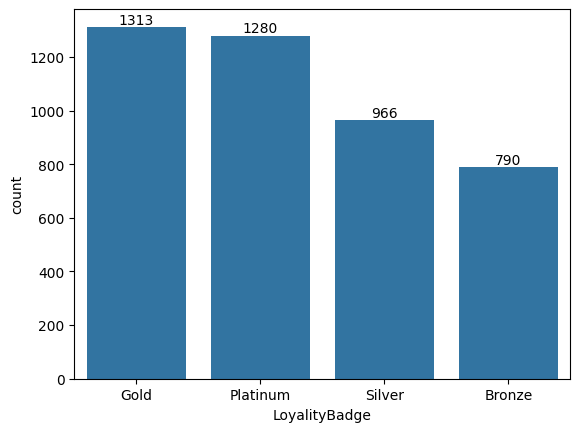

In [ ]:
# Distribution of the customers
ax = sns.countplot(x = segmented_data['LoyalityBadge'],
              order = segmented_data['LoyalityBadge'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# Exporting the segmented data into csv
segmented_data.to_csv('/content/drive/MyDrive/Datasets/Output/segment_data.csv')